# LAB 3

## The Sloan Digital Sky Survey which offers public data of space observations.

### This dataset consists of 10,000 records of observations of space taken by the Sloan Digital Sky Survey. Every observation is described by 17 feature columns and 1 target column which identifies the observation to be a star, a galaxy or a quasar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import scipy as sp
import thinkplot
import thinkstats2
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12

In [4]:
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

In [5]:
%matplotlib inline
sns.set_style('darkgrid')

In [6]:
plt.rcParams['figure.figsize'] = (15.0, 12.0)

In [31]:
data = pd.read_csv("Skyserver.csv", parse_dates = [0], error_bad_lines=False)

In [8]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.23765E+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.23765E+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.23765E+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.23765E+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.23765E+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [9]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
objid        10000 non-null object
ra           10000 non-null float64
dec          10000 non-null float64
u            10000 non-null float64
g            10000 non-null float64
r            10000 non-null float64
i            10000 non-null float64
z            10000 non-null float64
run          10000 non-null int64
rerun        10000 non-null int64
camcol       10000 non-null int64
field        10000 non-null int64
specobjid    10000 non-null float64
class        10000 non-null object
redshift     10000 non-null float64
plate        10000 non-null int64
mjd          10000 non-null int64
fiberid      10000 non-null int64
dtypes: float64(9), int64(7), object(2)
memory usage: 1.4+ MB


In [11]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [12]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing')

,column_name,percent_missing
objid,objid,0.0
plate,plate,0.0
redshift,redshift,0.0
class,class,0.0
specobjid,specobjid,0.0
field,field,0.0
camcol,camcol,0.0
rerun,rerun,0.0
run,run,0.0
z,z,0.0


#### As we can see there're no missing values

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
ra,1.000000,0.003596,0.031238,0.043909,0.047103,0.045731,0.042950,-0.092741,NaN,-0.006294,0.594700,-0.095327,0.030307,-0.095329,-0.086887,0.057485
dec,0.003596,1.000000,0.035279,0.061875,0.063404,0.058292,0.056870,0.778385,NaN,0.114614,-0.131471,0.088345,0.067021,0.088342,0.066147,0.155012
u,0.031238,0.035279,1.000000,0.849232,0.692379,0.602630,0.551483,0.038229,NaN,0.009945,0.008548,-0.129429,0.163741,-0.129430,-0.168793,0.011301
g,0.043909,0.061875,0.849232,1.000000,0.958106,0.907419,0.879622,0.058446,NaN,0.010223,0.014651,-0.054979,0.407576,-0.054981,-0.092772,0.047187
r,0.047103,0.063404,0.692379,0.958106,1.000000,0.977672,0.969197,0.057261,NaN,0.010747,0.017133,0.019788,0.441080,0.019787,-0.009345,0.061081
i,0.045731,0.058292,0.602630,0.907419,0.977672,1.000000,0.981507,0.049765,NaN,0.013461,0.019781,0.072960,0.431450,0.072958,0.050896,0.069977
z,0.042950,0.056870,0.551483,0.879622,0.969197,0.981507,1.000000,0.048252,NaN,0.010930,0.018248,0.112398,0.424034,0.112397,0.095658,0.067980
run,-0.092741,0.778385,0.038229,0.058446,0.057261,0.049765,0.048252,1.000000,NaN,0.151814,-0.463898,0.093604,0.059056,0.093601,0.070354,0.138566
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
camcol,-0.006294,0.114614,0.009945,0.010223,0.010747,0.013461,0.010930,0.151814,NaN,1.000000,-0.067921,0.040809,0.006834,0.040795,0.026284,0.535629


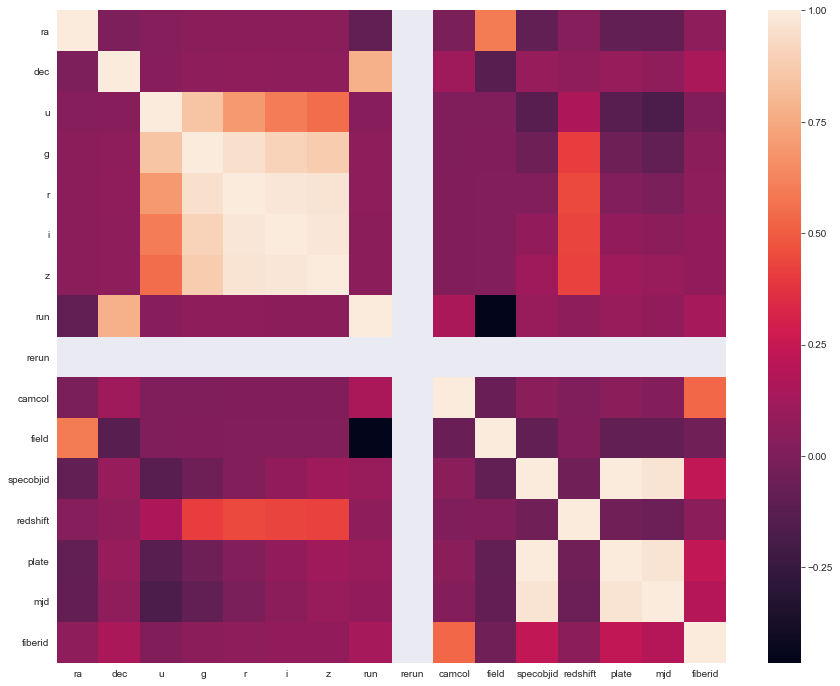

In [15]:
sns.heatmap(data.corr())
data.corr()

In [16]:
data.shape

(10000, 18)

In [17]:
data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

#### Putting data in columns

In [33]:
data['class'] = data['class'].astype('category').cat.codes

In [35]:
X = data.drop(['class'], axis=1).values
y = data['class'].values

di = {'STAR':1,'GALAXY':2,'QSO':3}
data.replace({'class':di}, inplace=True)

### Dimensionality reduction

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
features = ['u','g','r', 'i', 'z'];

# Normalization of the features
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

# PCA

In [39]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=2)

prinComp = pca.fit_transform(x)

ugriz_pca = pd.DataFrame(data = prinComp, columns = ['ugriz_pca1','ugriz_pca2'])

In [40]:
final_data = pd.concat([data[['ra']], data[['dec']], ugriz_pca, data[['redshift']], data[['class']], data[['mjd']] ], axis = 1)

In [41]:
final_data.head()

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,class,mjd
0,183.531326,0.089693,-1.063661,-1.605619,-0.000009,2,54922
1,183.598371,0.135285,-0.181554,-0.070793,-0.000055,2,51615
2,183.680207,0.126185,1.375966,-0.574447,0.123111,0,52023
3,183.870529,0.049911,-1.504058,0.574015,-0.000111,2,54922
4,183.883288,0.102557,-1.147961,1.290891,0.000590,2,54922


In [42]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score
import time

#### Feature Scaling before we apply SVM and KNN, which will be the first algorithms to be applied.

In [43]:
d = pd.DataFrame(final_data)

In [45]:
scaler = MinMaxScaler()

#### Some algorithms don't support categorical classes so we'll have to replace them with numbers

In [47]:
class_num = pd.DataFrame(LabelEncoder().fit_transform(d['class']), columns=['class'])
d.drop(['class'], axis=1, inplace=True)
names = list(d)

In [48]:
d = pd.DataFrame(scaler.fit_transform(d), columns=names)

In [49]:
d = pd.concat([d, class_num], axis=1)

In [50]:
d.head(6)

,ra,dec,ugriz_pca1,ugriz_pca2,redshift,mjd,class
0,0.693832,0.074025,0.441506,0.066876,0.000770,0.566492,2
1,0.694098,0.074642,0.488416,0.216500,0.000762,0.006268,2
2,0.694422,0.074519,0.571244,0.167401,0.023749,0.075385,0
3,0.695175,0.073487,0.418086,0.279360,0.000751,0.566492,2
4,0.695225,0.074199,0.437023,0.349246,0.000882,0.566492,2
5,0.695082,0.075162,0.640700,0.231773,0.000831,0.014908,2


In [56]:
X = scaler.fit_transform(X)

In [57]:
y = y.reshape(-1,1)

In [58]:
display(X)
display(y)

array([[0.00000000e+00, 6.93832273e-01, 7.40254729e-02, ...,
        7.70273543e-04, 3.73280943e-01, 5.66491614e-01],
       [0.00000000e+00, 6.94097640e-01, 7.46422070e-02, ...,
        7.61699432e-04, 6.99901768e-03, 6.26799932e-03],
       [0.00000000e+00, 6.94421555e-01, 7.45191099e-02, ...,
        2.37490694e-02, 2.57858546e-03, 7.53853973e-02],
       ...,
       [0.00000000e+00, 4.88097418e-01, 7.71724013e-01, ...,
        6.96997371e-04, 8.64071709e-01, 9.20718279e-01],
       [0.00000000e+00, 4.87798936e-01, 7.72888457e-01, ...,
        3.38840082e-03, 2.22249509e-02, 5.06522107e-02],
       [0.00000000e+00, 4.88542500e-01, 7.73595116e-01, ...,
        2.28730132e-02, 2.22249509e-02, 5.06522107e-02]])

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int8)

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
enc = OneHotEncoder()
y = enc.fit_transform(y).toarray()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [63]:
X_train.shape

(7500, 15)

In [64]:
y_train.shape

(7500, 3)

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
acc_knn = (preds == y_test).sum().astype(float) / len(preds)*100
print("Accuracy of KNN: ", acc_knn)

Accuracy of KNN:  279.36


In [72]:
accuracy_score(y_test, preds)

0.8928

In [74]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1239
           1       0.97      0.78      0.87       199
           2       0.92      0.86      0.89      1062

   micro avg       0.90      0.89      0.90      2500
   macro avg       0.92      0.86      0.89      2500
weighted avg       0.90      0.89      0.90      2500
 samples avg       0.89      0.89      0.89      2500



# SVM Kernels

In [83]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

### Just for beauty

In [84]:
names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]
classifiers = [
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    SVC(kernel="poly", C=0.025),
    SVC(kernel="sigmoid", gamma=2)]

In [85]:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

In [86]:
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

In [87]:
h = .02  # step size in the mesh

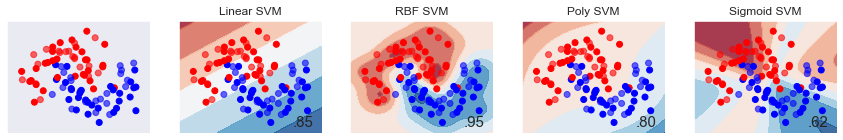

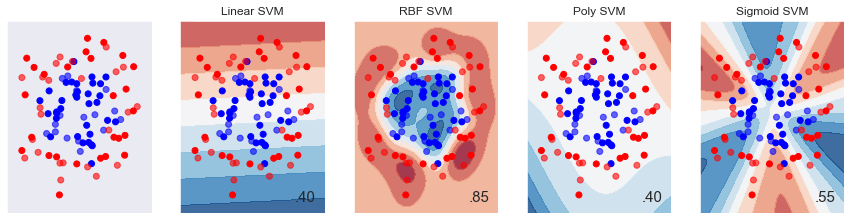

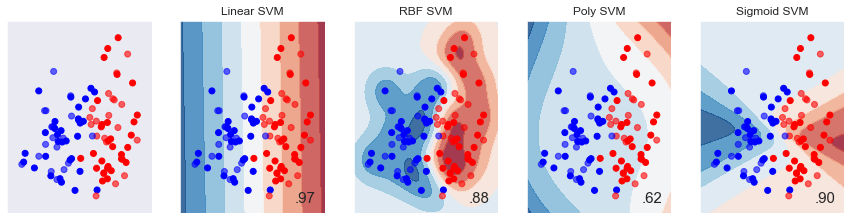

In [99]:
figure = plt.figure(figsize=(12, 7))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))


    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1


    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, 
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()

#### Build the Support Vector Machine model with the help of the SVC function

### Linear

In [101]:
# Create a linear SVM classifier 
clf = svm.SVC(kernel='linear')

In [102]:
# Train classifier 
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [103]:
y_preds = clf.predict(X_test)

In [104]:
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[20  1]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        19

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40



### Polynomial

In [105]:
clf1 = svm.SVC(kernel='poly', degree = 8)
clf1.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=8, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [106]:
y_preds1 = clf1.predict(X_test)

In [107]:
print(confusion_matrix(y_test, y_preds1))
print(classification_report(y_test, y_preds1))

[[ 3 18]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        21
           1       0.47      0.84      0.60        19

    accuracy                           0.48        40
   macro avg       0.49      0.49      0.41        40
weighted avg       0.49      0.47      0.40        40



### Gaussian

In [108]:
clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [109]:
y_preds2 = clf2.predict(X_test)

In [110]:
print(confusion_matrix(y_test, y_preds2))
print(classification_report(y_test, y_preds2))

[[17  4]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        21
           1       0.82      0.95      0.88        19

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40



### Sigmoid

In [111]:
clf3 = svm.SVC(kernel='sigmoid')
clf3.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='sigmoid', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
y_preds3 = clf3.predict(X_test)

In [113]:
print(confusion_matrix(y_test, y_preds3))
print(classification_report(y_test, y_preds3))

[[19  2]
 [ 1 18]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.90      0.95      0.92        19

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40



#### linear and sigmoid kernels are the most suitable in my case

# Decision boundary shape (OVO, OVR)

In [116]:
print(data.shape)

(10000, 16)


import itertools

from numpy.testing import assert_array_equal, assert_array_almost_equal
from numpy.testing import assert_almost_equal
from scipy import sparse
from nose.tools import assert_raises, assert_true, assert_equal, assert_false

from sklearn import svm, linear_model, datasets, metrics, base
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.utils import check_random_state
from sklearn.utils.validation import NotFittedError
from sklearn.utils.testing import assert_greater, assert_in, assert_less
from sklearn.utils.testing import assert_raises_regexp, assert_warns
from sklearn.utils.testing import assert_warns_message, assert_raise_message
from sklearn.utils.testing import ignore_warnings

from sklearn.multiclass import OneVsRestClassifier

clf = svm.SVC(kernel='linear', C=0.1,
                  decision_function_shape='ovr').fit(X_train, y_train)
dec = clf.decision_function(X_test)
assert_equal(dec.shape, (len(X_test), 3))
assert_array_equal(clf.predict(X_test), np.argmax(dec, axis=1))

In [142]:
from math import *

In [143]:
def logistic_regression(X, y, alpha):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(n+1)
    h = hypothesis(theta, X, n)
    theta, theta_history, cost = Gradient_Descent(theta, alpha
                                 , 100000, h, X, y, n)
    return theta, theta_history, cost
def Gradient_Descent(theta, alpha, num_iters, h, X, y, n):
    theta_history = np.ones((num_iters,n+1))
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h - y) *
                                   X.transpose()[j])
        theta_history[i] = theta
        h = hypothesis(theta, X, n)
        cost[i] = (-1/X.shape[0]) * sum(y * np.log(h) + (1 - y) * 
                                        np.log(1 - h))
    theta = theta.reshape(1,n+1)
    return theta, theta_history, cost
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = 1 / (1 + exp(-float(np.matmul(theta, X[i]))))
    h = h.reshape(X.shape[0])
    return h

In [145]:
theta, theta_history, cost = logistic_regression(X_train, y_train, 0.001)

In [159]:
theta

array([[ 0.78753678, -4.78357162,  0.33012471]])

In [161]:
Xp = np.concatenate((np.ones((X_train.shape[0],1)), X_train),axis= 1)
h = hypothesis(theta, Xp, Xp.shape[1] - 1)

Text(0, 0.5, 'Marks obtained in 2nd Exam')

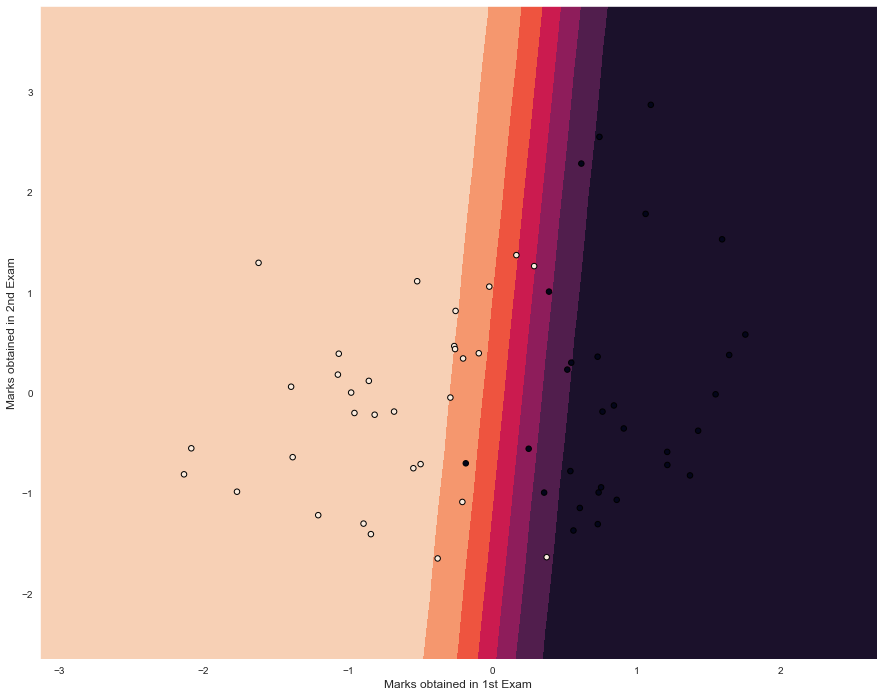

In [175]:
# Plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
X = np.concatenate((np.ones((xx.shape[0]*xx.shape[1],1))
                 ,  np.c_[xx.ravel(), yy.ravel()]), axis = 1)
h = hypothesis(theta, X, 2)
h = h.reshape(xx.shape)
plt.contourf(xx, yy, h)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                              s=30, edgecolor='k')
plt.xlabel("Marks obtained in 1st Exam")
plt.ylabel("Marks obtained in 2nd Exam")

In [180]:
def test_decision_function_shape():
    # check that decision_function_shape='ovr' gives
    # correct shape and is consistent with predict

    clf = svm.SVC(kernel='linear', C=0.1,
                  decision_function_shape='ovr').fit(iris.data, iris.target)
    dec = clf.decision_function(iris.data)
    assert_equal(dec.shape, (len(iris.data), 3))
    assert_array_equal(clf.predict(iris.data), np.argmax(dec, axis=1))

    # with five classes:
    X, y = make_blobs(n_samples=80, centers=5, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    clf = svm.SVC(kernel='linear', C=0.1,
                  decision_function_shape='ovr').fit(X_train, y_train)
    dec = clf.decision_function(X_test)
    assert_equal(dec.shape, (len(X_test), 5))
    assert_array_equal(clf.predict(X_test), np.argmax(dec, axis=1))

    # check shape of ovo_decition_function=True
    clf = svm.SVC(kernel='linear', C=0.1,
                  decision_function_shape='ovo').fit(X_train, y_train)
    dec = clf.decision_function(X_train)
    assert_equal(dec.shape, (len(X_train), 10))

    # check deprecation warning
    clf = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train)
    msg = "change the shape of the decision function"
    dec = assert_warns_message(ChangedBehaviorWarning, msg,
                               clf.decision_function, X_train)
    assert_equal(dec.shape, (len(X_train), 10))


In [184]:
estim1 = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovo'))
estim1.fit(X,y)

estim2 = OneVsRestClassifier(SVC(kernel='linear', decision_function_shape='ovr'))
estim2.fit(X,y)

print(estim1.coef_ == estim2.coef_)

[[ True  True]
 [ True  True]
 [ True  True]]
